In [1]:
#Importing Libraries
from numpy import array
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Flatten,TimeDistributed,Bidirectional,Conv1D,Flatten,MaxPooling1D,Bidirectional,LSTM,Dropout,TimeDistributed,MaxPool2D
#import the librearies
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense,LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [2]:
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split as split

from keras.layers import Input
from keras.models import Model

from deap import base, creator, tools, algorithms
from scipy.stats import bernoulli
from bitstring import BitArray

np.random.seed(1120)

In [3]:
import yfinance as yf
#data = yf.download("AAPL", start="2017-01-01", end="2017-04-30")
#show the data
aapl=yf.Ticker('AAPL')
df=aapl.history(start="2010-01-01",  end="2023-02-18")
df.tail()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-02-13 00:00:00-05:00,150.949997,154.259995,150.919998,153.850006,62199000,0.0,0.0
2023-02-14 00:00:00-05:00,152.119995,153.770004,150.860001,153.199997,61707600,0.0,0.0
2023-02-15 00:00:00-05:00,153.110001,155.500000,152.880005,155.330002,65669300,0.0,0.0
2023-02-16 00:00:00-05:00,153.509995,156.330002,153.350006,153.710007,68167900,0.0,0.0
2023-02-17 00:00:00-05:00,152.350006,153.000000,150.850006,152.550003,59095900,0.0,0.0


In [4]:
#create a new dataframe with only the close column
data=df.filter(['Close'])
#convert the dataframe to numpy array
dataset=data.values
#Get the number of rows to train the model on
training_data_len=math.ceil(len(dataset)*.8)
training_data_len

2644

In [5]:
scaler=MinMaxScaler(feature_range=(0,1))
scaled_data=scaler.fit_transform(dataset)
scaled_data.shape

(3305, 1)

In [6]:
#x_train,y_train=np.array(x_train),np.array(y_train)
#x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))
scaled_data=np.array(scaled_data)
scaled_data=np.reshape(scaled_data,(len(scaled_data),1))
#data = np.reshape(np.array(data['wp1']),(len(data['wp1']),1))
scaled_data.shape

(3305, 1)

In [7]:
#Create the training dataset
#Create the scaled training dataset
train_data=scaled_data[0:training_data_len,:]
#Split the data into x_train and y_train data sets
x_train=[]
y_train=[]
for i in range(60,len(train_data)):
    x_train.append(train_data[i-60:i,0])
    y_train.append(train_data[i,0])
    if i<=61:
        print(x_train)
        print(y_train)
        print()

[array([3.81776332e-03, 3.88207846e-03, 3.28925450e-03, 3.22145675e-03,
       3.46483594e-03, 3.13973946e-03, 2.72423415e-03, 3.23361452e-03,
       3.02151611e-03, 2.41303539e-03, 3.99682738e-03, 3.42137557e-03,
       2.78508032e-03, 9.90951665e-04, 1.91583189e-03, 2.41478624e-03,
       2.75205687e-03, 1.25866824e-03, 1.73994227e-06, 4.65914541e-04,
       6.62375295e-04, 1.24824222e-03, 0.00000000e+00, 5.92832147e-04,
       3.59870786e-04, 7.19741573e-04, 5.33720472e-04, 1.15088999e-03,
       1.44818013e-03, 1.97320362e-03, 1.82542579e-03, 1.89149178e-03,
       1.67243087e-03, 1.45512081e-03, 8.70991100e-04, 1.49686306e-03,
       1.72981079e-03, 2.18530476e-03, 2.94502410e-03, 2.92068400e-03,
       3.00412487e-03, 3.24404327e-03, 4.67658028e-03, 4.69917226e-03,
       5.38415589e-03, 5.70055540e-03, 5.81529341e-03, 6.00653706e-03,
       5.52670298e-03, 5.63276583e-03, 5.57538591e-03, 5.66752649e-03,
       5.25028397e-03, 5.68491228e-03, 6.31250782e-03, 6.48810290e-03,
     

In [8]:
#convert the x_train and y_train to numpy arrays
x_train,y_train=np.array(x_train),np.array(y_train)

In [9]:
#Reshape the data
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1]))
x_train.shape

(2584, 60)

In [10]:
y_train.shape

(2584,)

In [11]:
y_train=np.reshape(y_train,(y_train.shape[0],1))

In [12]:
y_train.shape

(2584, 1)

In [13]:
from keras.layers import LSTM, Activation, Dense, Dropout, Input, Embedding

In [14]:
#Create the testing data set
#Create a new array containing scaled values from index 2101 to 2701
test_data=scaled_data[training_data_len-60:,:]
#Create the data sets x_test and y_test
x_test=[]
y_test=dataset[training_data_len:,:]
for i in range(60,len(test_data)):
    x_test.append(test_data[i-60:i,0])

In [15]:
#Convert the data to a numpy array
x_test=np.array(x_test)

In [16]:
x_test=np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))

In [17]:
x_train=np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [18]:
# Defining model Architecture
model = Sequential()
model.add(LSTM(50,return_sequences=True,input_shape=(x_train.shape[1],1)))
model.add(Conv1D(filters=64, kernel_size=2, activation='relu', input_shape=(60,
1)))
model.add(MaxPooling1D(pool_size=2))
model.add(Flatten())
model.add(Dense(100, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')
#model.fit(x_train,y_train,epochs=20, verbose=0)


In [19]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 60, 50)            10400     
                                                                 
 conv1d (Conv1D)             (None, 59, 64)            6464      
                                                                 
 max_pooling1d (MaxPooling1D  (None, 29, 64)           0         
 )                                                               
                                                                 
 flatten (Flatten)           (None, 1856)              0         
                                                                 
 dense (Dense)               (None, 100)               185700    
                                                                 
 dense_1 (Dense)             (None, 1)                 101       
                                                        

In [24]:
model.fit(x_train,y_train,epochs=5, verbose=0)


In [25]:
predictions=model.predict(x_test)
predictions=scaler.inverse_transform(predictions)
predictions

21/21 [==============================] - 1s 29ms/step


array([[ 88.55104 ],
       [ 88.99778 ],
       [ 89.38871 ],
       [ 90.11472 ],
       [ 90.84267 ],
       [ 91.536224],
       [ 92.030556],
       [ 92.56288 ],
       [ 93.16627 ],
       [ 93.52125 ],
       [ 93.65523 ],
       [ 93.569336],
       [ 93.618645],
       [ 93.53434 ],
       [ 93.38481 ],
       [ 92.39452 ],
       [ 91.144936],
       [ 90.30151 ],
       [ 89.63189 ],
       [ 89.73853 ],
       [ 92.05171 ],
       [ 95.58046 ],
       [ 99.250145],
       [102.46883 ],
       [105.91393 ],
       [108.41984 ],
       [110.283035],
       [111.35334 ],
       [111.63389 ],
       [112.114746],
       [112.71797 ],
       [113.0865  ],
       [113.30329 ],
       [113.56615 ],
       [114.09565 ],
       [116.15123 ],
       [118.52968 ],
       [120.81316 ],
       [122.84805 ],
       [124.51102 ],
       [125.5266  ],
       [126.15017 ],
       [128.27036 ],
       [129.69989 ],
       [130.93665 ],
       [129.48026 ],
       [127.09422 ],
       [122.6

In [26]:
rmse=np.sqrt(np.mean(predictions-y_test)**2)
rmse

0.22414723683413507

C:\Users\HOME\AppData\Local\Temp\ipykernel_30884\1480295259.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  valid['Prediction']=predictions


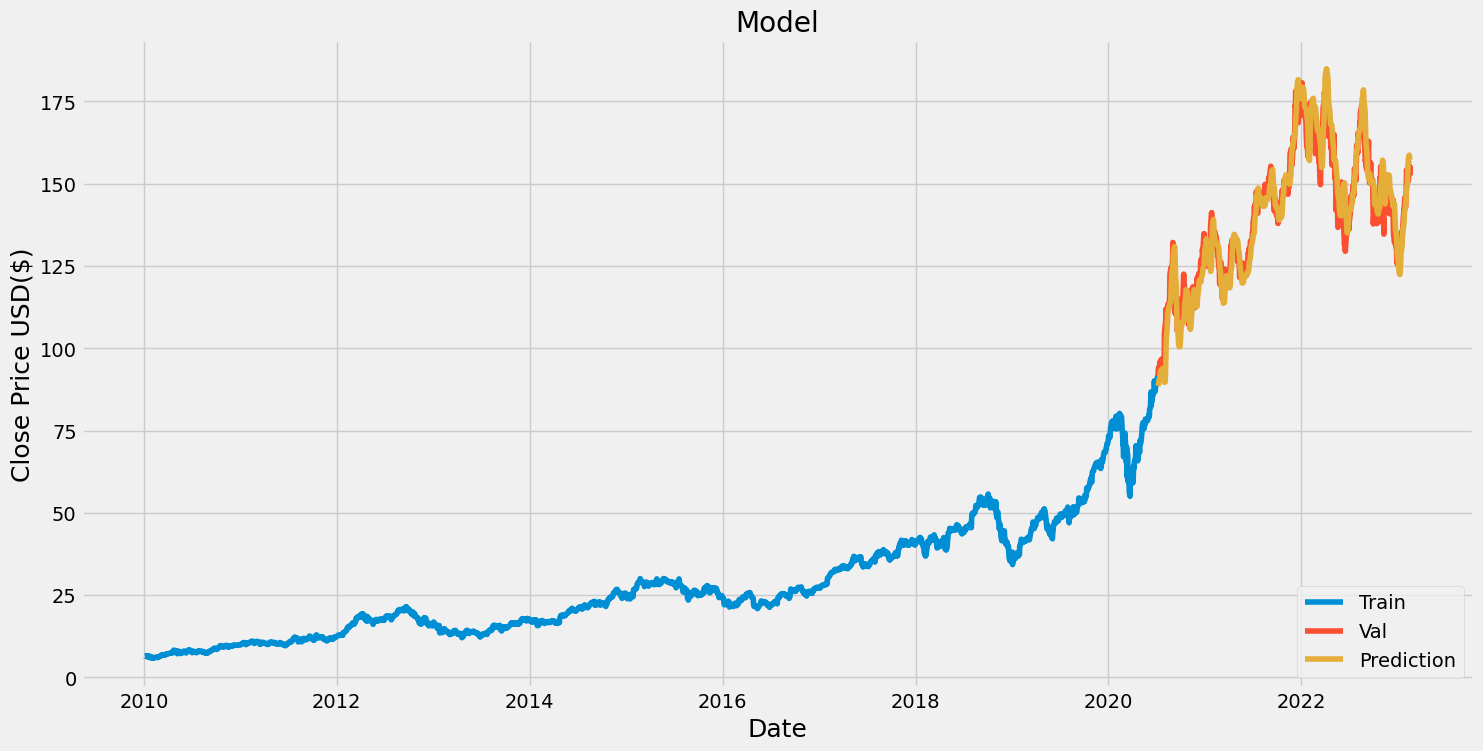

In [27]:
#Plot the data
train=data[:training_data_len]
valid=data[training_data_len:]
valid['Prediction']=predictions
#visualize the data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date',fontsize=18)
plt.ylabel('Close Price USD($)',fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close','Prediction']])
plt.legend(['Train','Val','Prediction'],loc='lower right')
plt.show()